A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base whee majority of them are
liability customers (depositors) vs borrowers (asset customers). The bank is interested in expanding the borrowers base rapidly to bring in more
business via loan interests. A campaign that the bank ran in last quarter showed an average single digit conversion rate. Digital transformation
being the core strength of the business strategy, marketing department wants to devise effective campaigns with better target marketing to
increase the conversion ratio to double digit with same budget as per last campaign.

Build a Machine Learning model to perform focused marketing by predicting the potential customers who will convert
using the historical dataset.

#Data Understanding and Preparation

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

%matplotlib inline

##1A

In [ ]:
data1 = pd.read_csv('/content/drive/MyDrive/GL AIML/Lab/Lab Datasets/Dataset/Part_2_Data/Data1.csv')
data2 = pd.read_csv('/content/drive/MyDrive/GL AIML/Lab/Lab Datasets/Dataset/Part_2_Data/Data2.csv')
print(data1.shape,data2.shape)

(5000, 8) (5000, 7)


##1B

In [ ]:
data1.columns

Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level'],
      dtype='object')

In [ ]:
data2.columns

Index(['ID', 'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking',
       'CreditCard', 'LoanOnCard'],
      dtype='object')

In [ ]:
data1.sample(5)

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
2946,2947,33,9,145,94110,1,4.3,1
870,871,43,19,35,92106,3,0.5,1
2068,2069,61,37,13,90024,2,0.3,3
2997,2998,57,33,80,95053,4,1.6,2
741,742,61,37,22,94590,1,1.2,3


In [ ]:
data2.sample(5)

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
945,946,0,0,0,1,0,0.0
2155,2156,0,0,0,1,0,0.0
4237,4238,0,1,0,0,0,0.0
2910,2911,0,0,0,1,0,1.0
997,998,0,0,0,0,0,0.0


##1C

In [ ]:
df = pd.merge(data1,data2,how='inner',on='ID')
df.sample(5)

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
2112,2113,27,2,103,93117,1,1.9,1,120,0,0,1,0,0.0
4923,4924,40,15,73,92029,3,3.0,1,0,0,0,1,1,0.0
1438,1439,63,37,90,94105,4,1.9,2,106,1,0,1,0,0.0
3931,3932,53,27,170,95003,1,1.0,1,0,0,0,1,0,0.0
4296,4297,35,9,84,94709,4,2.2,2,0,0,0,1,0,0.0


In [ ]:
df.drop('ZipCode',axis=1,inplace=True)

In [ ]:
df.shape

(5000, 13)

In [ ]:
df.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

##1D

I didnt change the columns to object because objects/string are not supportive dtypes for model processing and what was mentioned in the problem statment as reason doesnt seem to add sense with my understanding in class. would appreciate if you could explain more in detail.

In [ ]:
df['LoanOnCard'].value_counts().astype(int)

0.0    4500
1.0     480
Name: LoanOnCard, dtype: int64

#Data Exploration and Analysis

###2A

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


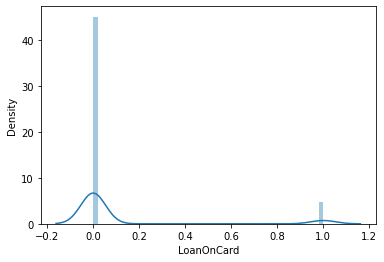

In [ ]:
sns.distplot(df['LoanOnCard'])



*   There is major class imbalance
*   There are no other values except 1 and 0



###2B

In [ ]:
df.isnull().sum()/len(df)

ID                     0.000
Age                    0.000
CustomerSince          0.000
HighestSpend           0.000
HiddenScore            0.000
MonthlyAverageSpend    0.000
Level                  0.000
Mortgage               0.000
Security               0.000
FixedDepositAccount    0.000
InternetBanking        0.000
CreditCard             0.000
LoanOnCard             0.004
dtype: float64

In [ ]:
missing_df = df[df['LoanOnCard'].isnull() == True]
missing_df.shape

(20, 13)

In [ ]:
without_missing_df = df[df['LoanOnCard'].isnull() == False]
without_missing_df.shape

(4980, 13)

In [ ]:
imputer = KNNImputer(n_neighbors=2)
imputer.fit(without_missing_df)

KNNImputer(n_neighbors=2)

In [ ]:
missing_arr = imputer.transform(missing_df)
filled_df = pd.DataFrame(data = missing_arr,columns= missing_df.columns)
filled_df

,ID,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1.0,25.0,1.0,49.0,4.0,1.6,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2.0,45.0,19.0,34.0,3.0,1.5,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3.0,39.0,15.0,11.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,35.0,9.0,100.0,1.0,2.7,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,35.0,8.0,45.0,4.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
5,6.0,37.0,13.0,29.0,4.0,0.4,2.0,155.0,0.0,0.0,1.0,0.0,0.0
6,7.0,53.0,27.0,72.0,2.0,1.5,2.0,0.0,0.0,0.0,1.0,0.0,0.0
7,8.0,50.0,24.0,22.0,1.0,0.3,3.0,0.0,0.0,0.0,0.0,1.0,0.0
8,9.0,35.0,10.0,81.0,3.0,0.6,2.0,104.0,0.0,0.0,1.0,0.0,0.5
9,80.0,50.0,26.0,19.0,2.0,0.4,1.0,118.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
missing_df.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

In [ ]:
filled_df.dtypes

ID                     float64
Age                    float64
CustomerSince          float64
HighestSpend           float64
HiddenScore            float64
MonthlyAverageSpend    float64
Level                  float64
Mortgage               float64
Security               float64
FixedDepositAccount    float64
InternetBanking        float64
CreditCard             float64
LoanOnCard             float64
dtype: object

In [ ]:
filled_df['LoanOnCard'].value_counts()

0.0    18
0.5     2
Name: LoanOnCard, dtype: Int64

In [ ]:
filled_df = filled_df.convert_dtypes()
filled_df.dtypes

ID                       Int64
Age                      Int64
CustomerSince            Int64
HighestSpend             Int64
HiddenScore              Int64
MonthlyAverageSpend    Float64
Level                    Int64
Mortgage                 Int64
Security                 Int64
FixedDepositAccount      Int64
InternetBanking          Int64
CreditCard               Int64
LoanOnCard             Float64
dtype: object

In [ ]:
list(filled_df.columns) == list(missing_df.columns)

True

In [ ]:
cleaned_df = without_missing_df.append(filled_df)
cleaned_df.reset_index()
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 9 to 19
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   5000 non-null   Int64 
 1   Age                  5000 non-null   Int64 
 2   CustomerSince        5000 non-null   Int64 
 3   HighestSpend         5000 non-null   Int64 
 4   HiddenScore          5000 non-null   Int64 
 5   MonthlyAverageSpend  5000 non-null   object
 6   Level                5000 non-null   Int64 
 7   Mortgage             5000 non-null   Int64 
 8   Security             5000 non-null   Int64 
 9   FixedDepositAccount  5000 non-null   Int64 
 10  InternetBanking      5000 non-null   Int64 
 11  CreditCard           5000 non-null   Int64 
 12  LoanOnCard           5000 non-null   object
dtypes: Int64(11), object(2)
memory usage: 600.6+ KB


In [ ]:
cleaned_df[cleaned_df.ID.duplicated()]

,ID,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard


In [ ]:
cleaned_df['LoanOnCard'].value_counts()

0    4520
1     480
Name: LoanOnCard, dtype: int64

In [ ]:
for cols in ['Age',
            'CustomerSince',
            'HiddenScore',
            'Level',
            'Mortgage',
            'Security',
            'FixedDepositAccount',
            'InternetBanking',
            'CreditCard',
            'LoanOnCard']:
    print(cleaned_df[cols].value_counts())
    print('------------------------------------------------------------------------')

35    151
43    149
52    145
54    143
58    143
50    138
41    136
30    136
56    135
34    134
39    133
57    132
59    132
51    129
60    127
45    127
46    127
42    126
55    125
31    125
40    125
29    123
62    123
61    122
44    121
32    120
33    120
48    118
49    115
38    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
26     78
64     78
25     53
24     28
66     24
67     12
23     12
Name: Age, dtype: int64
------------------------------------------------------------------------
 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 16    127
 14    127
 30    126
 27    125
 34    125
 17    125
 29    124
 22    124
 7     121
 8     119
 15    119
 6     119
 10    118
 13    117
 33    117
 37    116
 11    116
 36    114
 4     113
 21    113
 31    104
 12    102
 38     88
 2      85
 39     85
 1      74
 0      66
 40     57
 4

In [ ]:
cleaned_df.sample(5)

,ID,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
4647,4648,59,35,43,4,1.3,1,0,0,0,1,0,0.0
877,878,35,11,59,4,0.1,2,0,0,0,0,0,0.0
2066,2067,41,16,30,2,1.4,2,0,0,0,0,1,0.0
558,559,30,5,38,4,2.0,2,0,1,0,0,0,0.0
2237,2238,30,5,134,1,0.0,1,0,0,0,1,1,0.0


In [ ]:
cleaned_df.shape

(5000, 13)

In [ ]:
cleaned_df = cleaned_df.convert_dtypes()
cleaned_df.dtypes

ID                       Int64
Age                      Int64
CustomerSince            Int64
HighestSpend             Int64
HiddenScore              Int64
MonthlyAverageSpend    Float64
Level                    Int64
Mortgage                 Int64
Security                 Int64
FixedDepositAccount      Int64
InternetBanking          Int64
CreditCard               Int64
LoanOnCard             Float64
dtype: object

In [ ]:
list (cleaned_df.columns)

['ID',
 'Age',
 'CustomerSince',
 'HighestSpend',
 'HiddenScore',
 'MonthlyAverageSpend',
 'Level',
 'Mortgage',
 'Security',
 'FixedDepositAccount',
 'InternetBanking',
 'CreditCard',
 'LoanOnCard']

###2C

In [ ]:
for cols in ['ID','Age',
            'CustomerSince',
            'HiddenScore',
            'Level',
            'Mortgage',
            'Security',
            'FixedDepositAccount',
            'InternetBanking',
            'CreditCard',
            'LoanOnCard']:
    cleaned_df[cols]= cleaned_df[cols].astype(int)
cleaned_df.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             Int64
HiddenScore              int64
MonthlyAverageSpend    Float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard               int64
dtype: object

There are no unexpected values in the features

if there were any I would have not been able to change the dtype

In [ ]:
cleaned_df.shape

(5000, 13)

In [ ]:
cleaned_df.reset_index(inplace=True)

In [ ]:
cleaned_df.index.is_unique

True

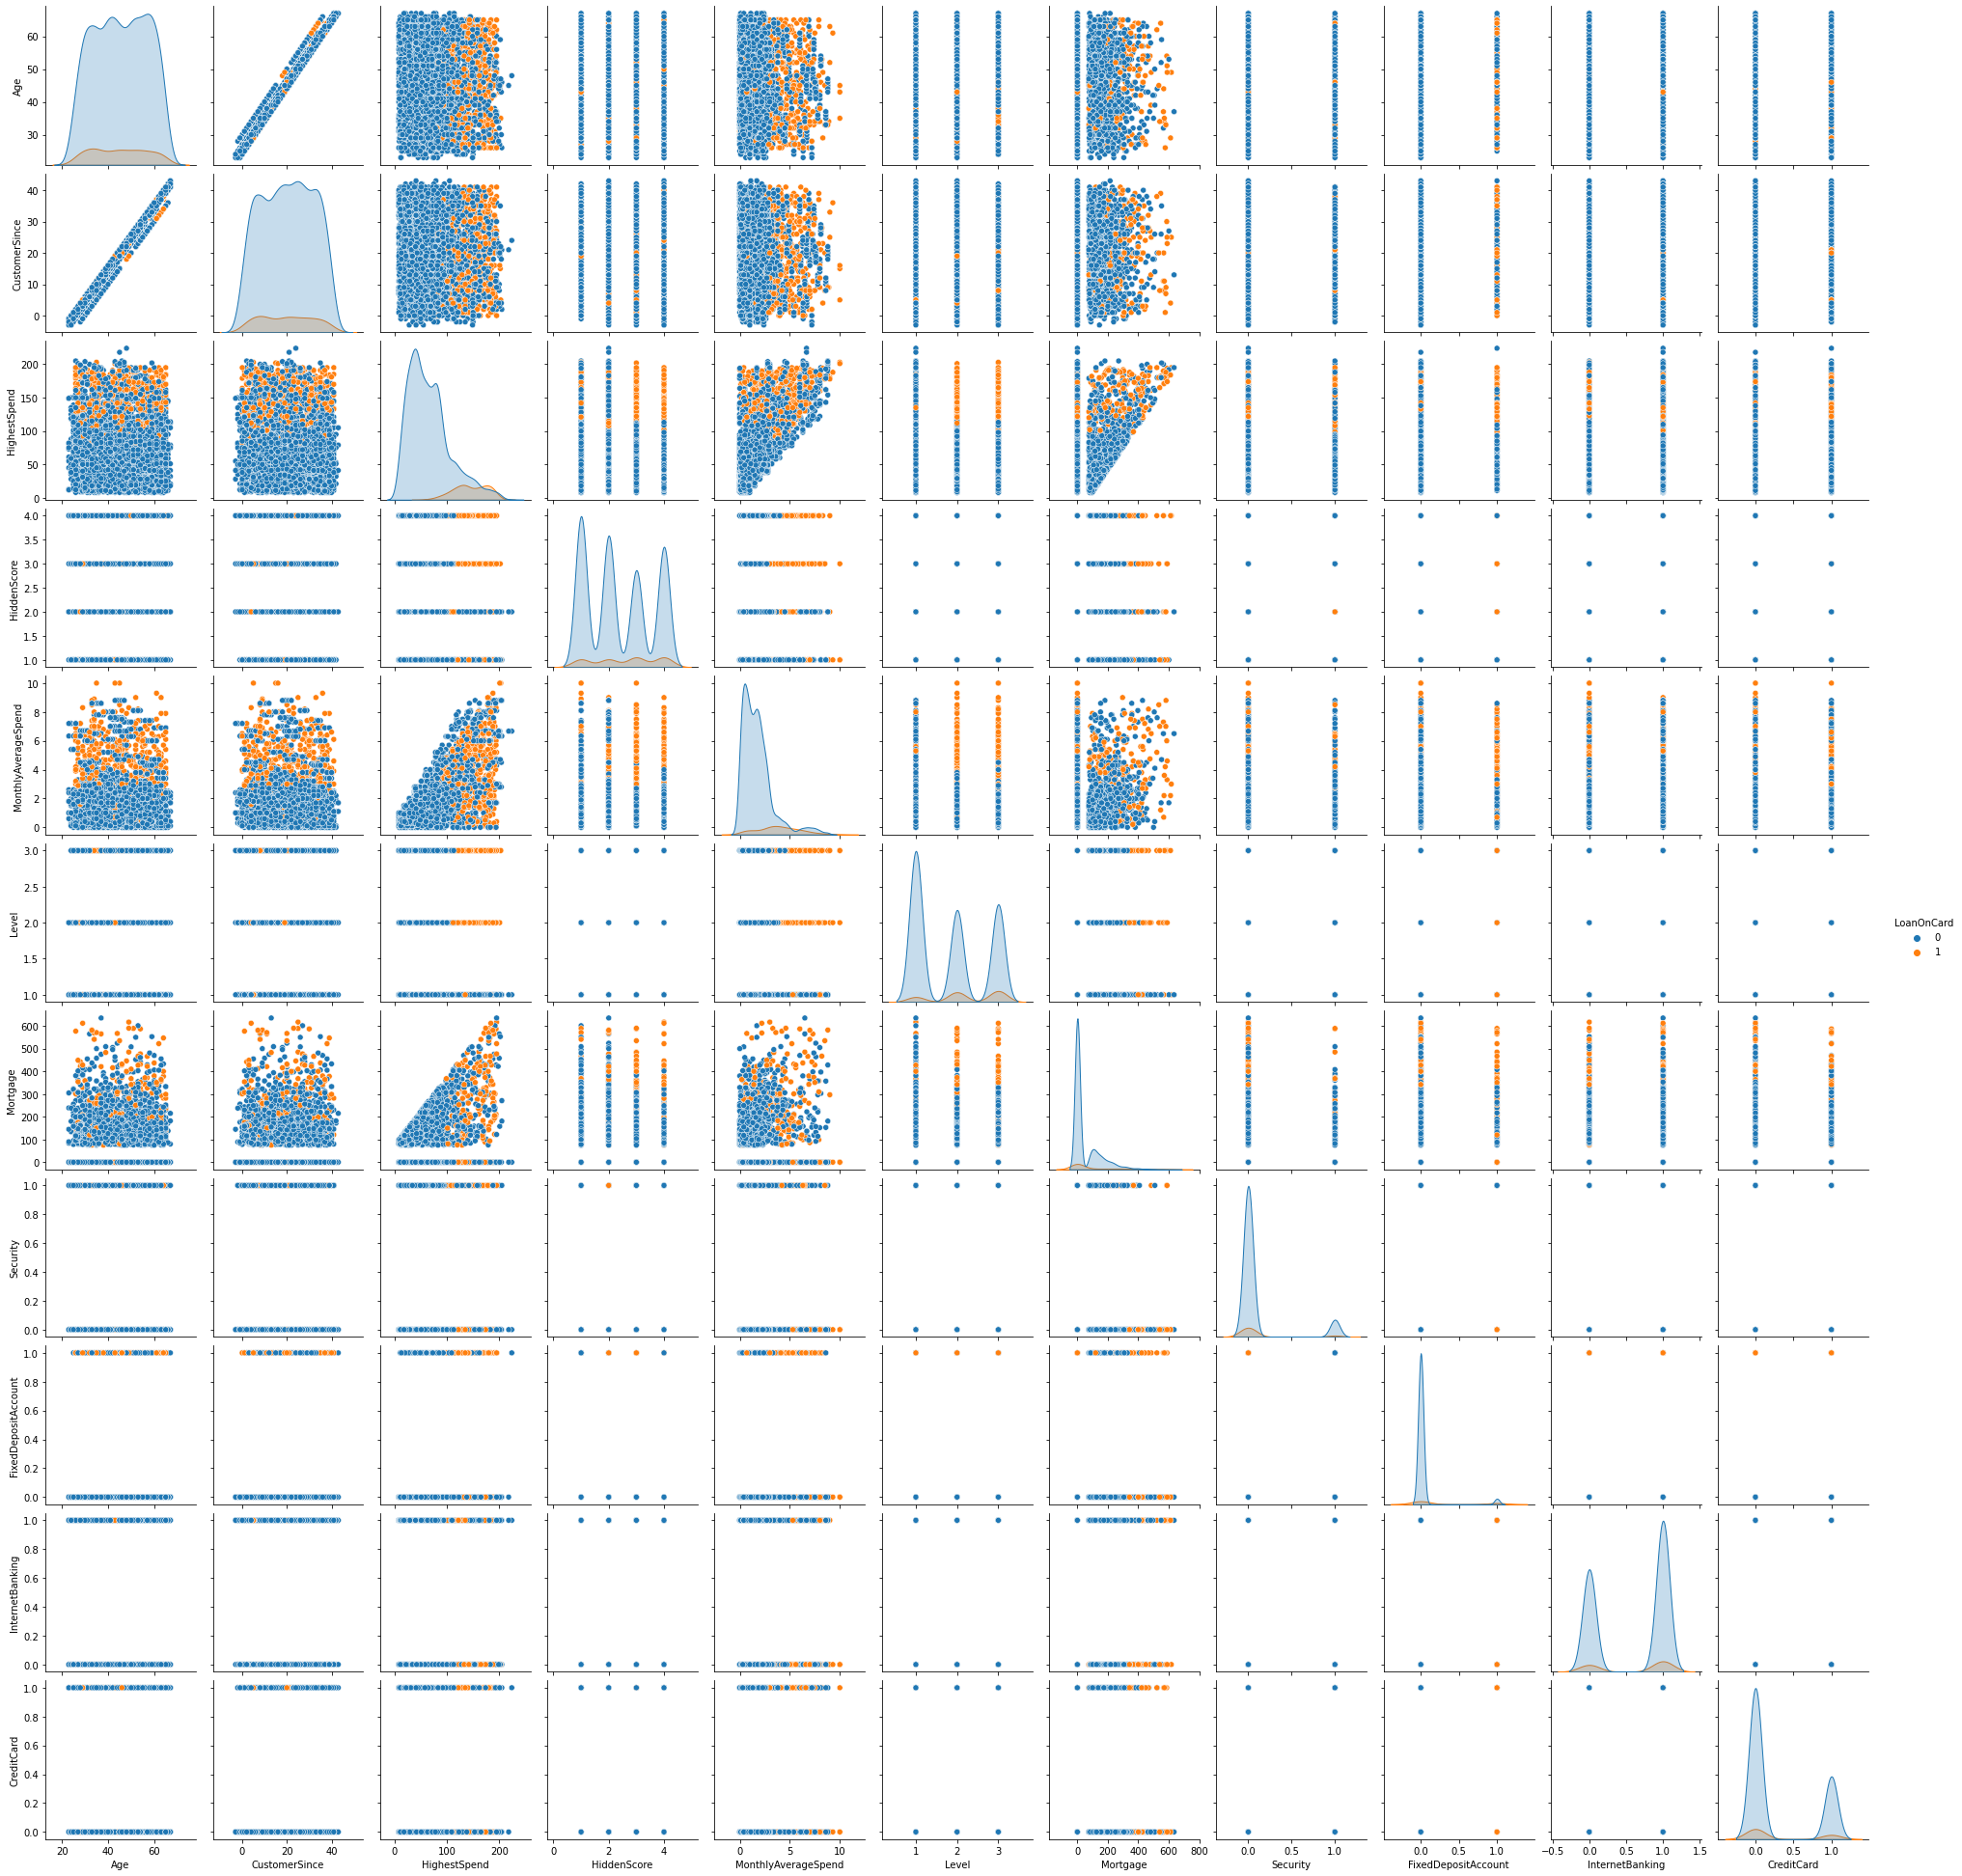

In [ ]:
sns.pairplot(cleaned_df.iloc[:,2:],hue='LoanOnCard')

#Data Preparation and Modelbuilding

##3A 3B

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(cleaned_df.iloc[:,0:13],cleaned_df.iloc[:,13], test_size=0.25, random_state=4320)
print(df.shape,x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(5000, 13) (3750, 13) (3750,) (1250, 13) (1250,)


In [ ]:
 def eval(actual,predicted):
    con_mat = confusion_matrix(actual,predicted)
    class_rep = classification_report(actual,predicted)
    acc_score = accuracy_score(actual,predicted)*100
    print('Accuracy is ', round(acc_score,2))
    print('Class Report \n',class_rep)
    print('Confusion Mat\n', con_mat)
    
def models(classifier,xtrain_data,xtest_data,ytrain_data,ytest_data): # getting the classifer and train and test data
    classifier.fit(xtrain_data,ytrain_data) # trainig the data with features and output
    tr_predicted = classifier.predict(xtrain_data) # predicting it based on the trained model
    tr_actual = ytrain_data
    te_predicted = classifier.predict(xtest_data)
    te_actual = ytest_data
    print('_____________Train Results____________')
    eval(tr_actual,tr_predicted)
    print('_____________Test Results____________')
    eval(te_actual,te_predicted)

##3C 3D

In [ ]:
models(LogisticRegression(random_state=4320,verbose=1),x_train,x_test,y_train,y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_____________Train Results____________
Accuracy is  94.56
Class Report 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      3396
           1       0.78      0.58      0.67       354

    accuracy                           0.95      3750
   macro avg       0.87      0.78      0.82      3750
weighted avg       0.94      0.95      0.94      3750

Confusion Mat
 [[3339   57]
 [ 147  207]]
_____________Test Results____________
Accuracy is  93.44
Class Report 
               precision    recall  f1-score   support

           0       0.95      0.98      0.96      1124
           1       0.75      0.52      0.62       126

    accuracy                           0.93      1250
   macro avg       0.85      0.75      0.79      1250
weighted avg       0.93      0.93      0.93      1250

Confusion Mat
 [[1102   22]
 [  60   66]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished




*   Model has less variation
*   recall for class 1 is very poor



In [ ]:
cleaned_df.head()

,index,ID,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,9,10,34,9,180,1,8.9,3,0,0,0,0,0,1
1,10,11,65,39,105,4,2.4,3,0,0,0,0,0,0
2,11,12,29,5,45,3,0.1,2,0,0,0,1,0,0
3,12,13,48,23,114,2,3.8,3,0,1,0,0,0,0
4,13,14,59,32,40,4,2.5,2,0,0,0,1,0,0


In [ ]:
cleaned_df.drop(['index','ID'],axis=1,inplace=True)

##3E

In [ ]:
for_res_1 = cleaned_df.iloc[:,:-1]
for_res_1.head()

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
0,34,9,180,1,8.9,3,0,0,0,0,0
1,65,39,105,4,2.4,3,0,0,0,0,0
2,29,5,45,3,0.1,2,0,0,0,1,0
3,48,23,114,2,3.8,3,0,1,0,0,0
4,59,32,40,4,2.5,2,0,0,0,1,0


In [ ]:
for_res_0 = cleaned_df.iloc[:,-1]
for_res_0.value_counts()

0    4520
1     480
Name: LoanOnCard, dtype: int64

In [ ]:
for_res_1['MonthlyAverageSpend']=for_res_1['MonthlyAverageSpend'].round(decimals=0).astype(int)
for_res_1.dtypes

Age                    int64
CustomerSince          int64
HighestSpend           Int64
HiddenScore            int64
MonthlyAverageSpend    int64
Level                  int64
Mortgage               int64
Security               int64
FixedDepositAccount    int64
InternetBanking        int64
CreditCard             int64
dtype: object

In [ ]:
for_res_1['HighestSpend'] =for_res_1['HighestSpend'].astype(int)
for_res_1.dtypes

Age                    int64
CustomerSince          int64
HighestSpend           int64
HiddenScore            int64
MonthlyAverageSpend    int64
Level                  int64
Mortgage               int64
Security               int64
FixedDepositAccount    int64
InternetBanking        int64
CreditCard             int64
dtype: object

In [ ]:
for_res_0.dtypes

dtype('int64')

In [ ]:
for_res_1.sample(5)

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
1033,58,32,51,1,3,2,0,0,0,1,0
3844,62,32,142,2,3,3,0,0,0,0,1
2501,49,23,29,4,2,1,0,0,0,1,1
2500,56,29,45,4,2,2,113,0,0,1,0
4947,41,16,69,1,0,2,0,0,0,1,0


In [ ]:
sm = SMOTE(random_state=4320)
res_1,res_0 = sm.fit_resample(for_res_1,for_res_0)
print(res_1.shape,res_0.shape)

(9040, 11) (9040,)


In [ ]:
res_0.value_counts()

1    4520
0    4520
Name: LoanOnCard, dtype: int64

In [ ]:
res_1.head()

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
0,34,9,180,1,9,3,0,0,0,0,0
1,65,39,105,4,2,3,0,0,0,0,0
2,29,5,45,3,0,2,0,0,0,1,0
3,48,23,114,2,4,3,0,1,0,0,0
4,59,32,40,4,2,2,0,0,0,1,0


In [ ]:
balanced_data = pd.merge(res_1,res_0,how='outer',left_index=True,right_index=True)
balanced_data.reset_index(inplace=True)
balanced_data.drop('index',axis=1,inplace=True)
balanced_data.head()

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,34,9,180,1,9,3,0,0,0,0,0,1
1,65,39,105,4,2,3,0,0,0,0,0,0
2,29,5,45,3,0,2,0,0,0,1,0,0
3,48,23,114,2,4,3,0,1,0,0,0,0
4,59,32,40,4,2,2,0,0,0,1,0,0


In [ ]:
balanced_data.shape

(9040, 12)

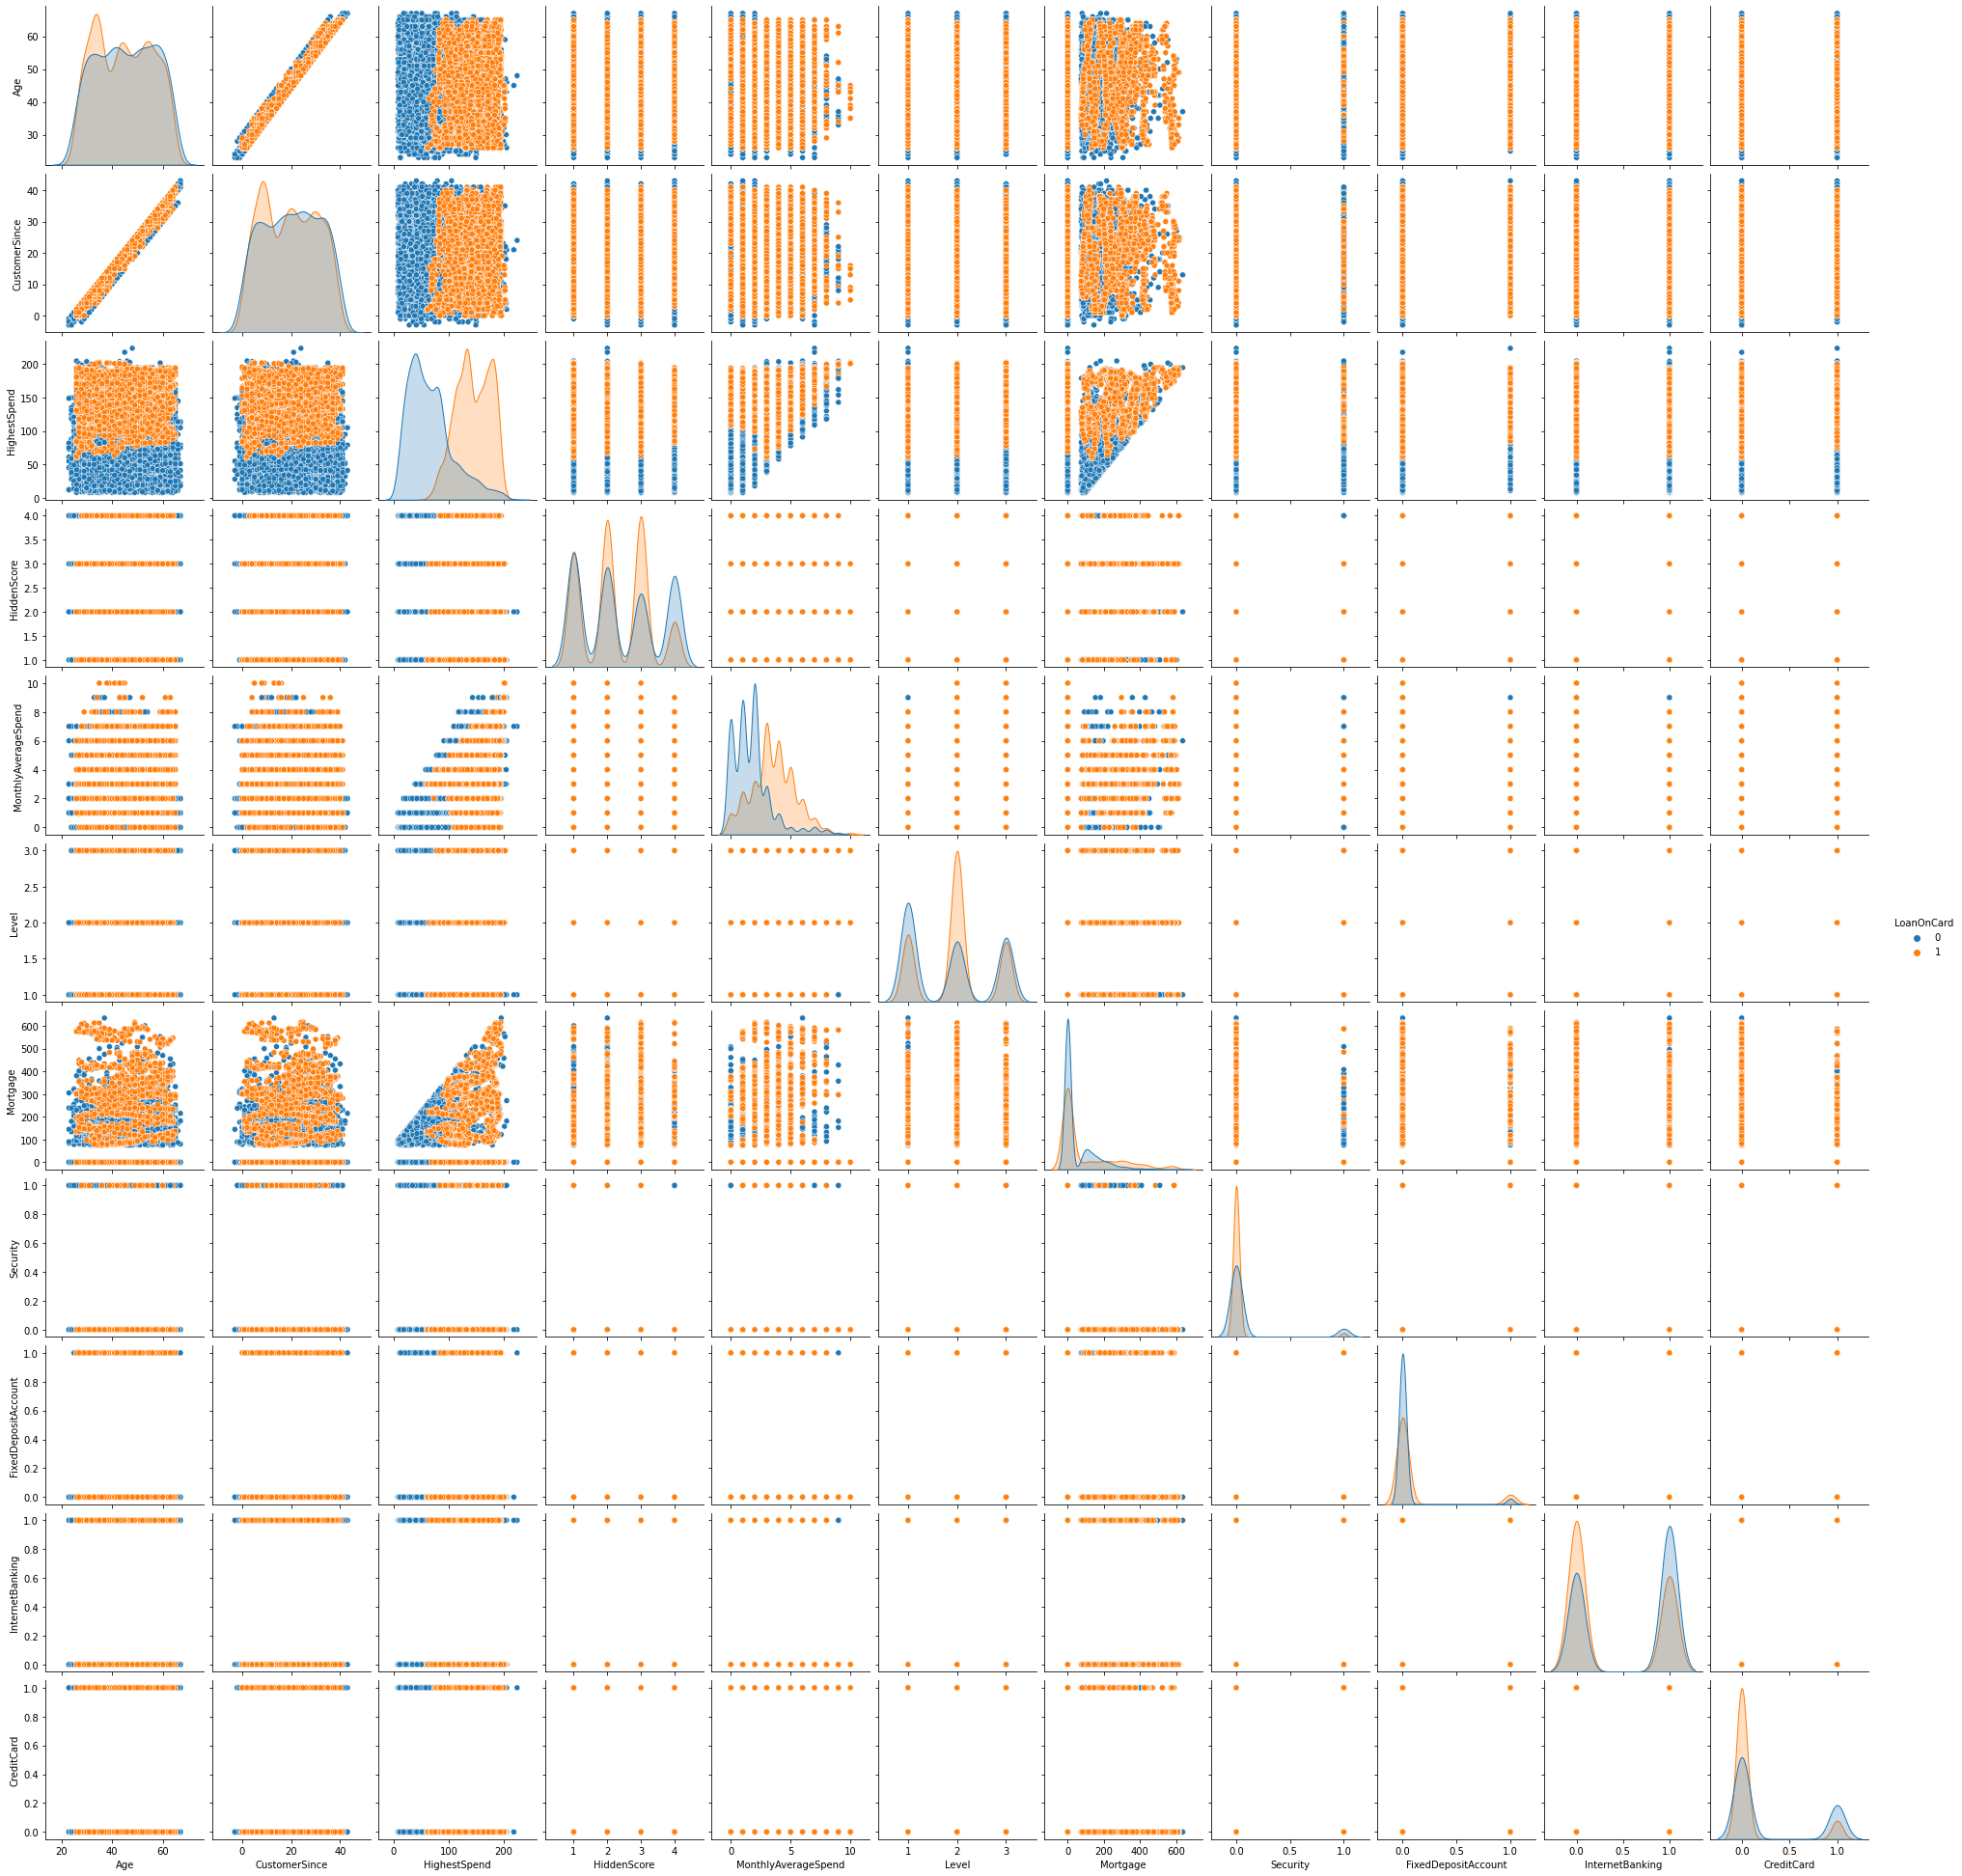

In [ ]:
sns.pairplot(balanced_data,hue='LoanOnCard')

##3F 3G

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(balanced_data.iloc[:,0:11],balanced_data.iloc[:,11], test_size=0.25, random_state=4320)
print(balanced_data.shape,x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(9040, 12) (6780, 11) (6780,) (2260, 11) (2260,)


In [ ]:
models(LogisticRegression(random_state=4320,verbose=1),x_train,x_test,y_train,y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_____________Train Results____________
Accuracy is  88.3
Class Report 
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      3430
           1       0.87      0.89      0.88      3350

    accuracy                           0.88      6780
   macro avg       0.88      0.88      0.88      6780
weighted avg       0.88      0.88      0.88      6780

Confusion Mat
 [[2999  431]
 [ 362 2988]]
_____________Test Results____________
Accuracy is  88.23
Class Report 
               precision    recall  f1-score   support

           0       0.89      0.86      0.88      1090
           1       0.88      0.90      0.89      1170

    accuracy                           0.88      2260
   macro avg       0.88      0.88      0.88      2260
weighted avg       0.88      0.88      0.88      2260

Confusion Mat
 [[ 941  149]
 [ 117 1053]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished




*   Accuracy is dropped but the is very minimal variation prediction both the class ideally
*   recall for class 1 is improved


#Performance Improvement

##4A

In [ ]:
svc = svc(random_state=4320)
svc.fit(x_train,y_train)
svc.score(x_train,y_train)

0.8766961651917404

In [ ]:
svc.score(x_test,y_test)

0.8792035398230088

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
models(knn,x_train,x_test,y_train,y_test)

_____________Train Results____________
Accuracy is  93.82
Class Report 
               precision    recall  f1-score   support

           0       0.99      0.89      0.94      3430
           1       0.89      0.99      0.94      3350

    accuracy                           0.94      6780
   macro avg       0.94      0.94      0.94      6780
weighted avg       0.94      0.94      0.94      6780

Confusion Mat
 [[3038  392]
 [  27 3323]]
_____________Test Results____________
Accuracy is  91.81
Class Report 
               precision    recall  f1-score   support

           0       0.97      0.85      0.91      1090
           1       0.88      0.98      0.93      1170

    accuracy                           0.92      2260
   macro avg       0.93      0.92      0.92      2260
weighted avg       0.92      0.92      0.92      2260

Confusion Mat
 [[ 929  161]
 [  24 1146]]


In [ ]:
knn.score(x_test,y_test)

0.918141592920354

##4B

In [ ]:
knn_param_grid = {'n_neighbors':[4,5,7,9,12,15,20,30,50],
                  'algorithm':('kd_tree', 'brute'), 
                  'leaf_size':[20,30,35,40,45,50]
}
grid_cv = GridSearchCV(estimator=KNeighborsClassifier(),param_grid=knn_param_grid,verbose = 1)
grid_cv.fit(x_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ('kd_tree', 'brute'),
                         'leaf_size': [20, 30, 35, 40, 45, 50],
                         'n_neighbors': [4, 5, 7, 9, 12, 15, 20, 30, 50]},
             verbose=1)

In [ ]:
grid_cv.best_params_

{'algorithm': 'brute', 'leaf_size': 20, 'n_neighbors': 4}

In [ ]:
grid_cv.best_score_

0.9233038348082596

In [ ]:
svc_param_grid = {'C': [1.0,1.2,1.4,2],
                  'kernel':('linear', 'poly', 'sigmoid','rbf'),
                  'decision_function_shape':('ovr','ovo')
}
grid_cv = GridSearchCV(estimator=SVC(random_state=4320),param_grid=svc_param_grid,verbose = 1)
grid_cv.fit(x_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(estimator=SVC(random_state=4320),
             param_grid={'C': [1.0, 1.2, 1.4, 2],
                         'decision_function_shape': ('ovr', 'ovo'),
                         'kernel': ('linear', 'poly', 'sigmoid', 'rbf')},
             verbose=1)

In [ ]:
grid_cv.best_params_

{'C': 1.0, 'decision_function_shape': 'ovr', 'kernel': 'linear'}

In [ ]:
grid_cv.best_score_

0.8920353982300885

##4C

In [ ]:
knn = KNeighborsClassifier(n_neighbors=4, weights='uniform', algorithm='brute', leaf_size=20, p=2, metric='minkowski')
models(knn,x_train,x_test,y_train,y_test)

_____________Train Results____________
Accuracy is  95.93
Class Report 
               precision    recall  f1-score   support

           0       0.99      0.93      0.96      3430
           1       0.93      0.99      0.96      3350

    accuracy                           0.96      6780
   macro avg       0.96      0.96      0.96      6780
weighted avg       0.96      0.96      0.96      6780

Confusion Mat
 [[3200  230]
 [  46 3304]]
_____________Test Results____________
Accuracy is  93.27
Class Report 
               precision    recall  f1-score   support

           0       0.96      0.89      0.93      1090
           1       0.91      0.97      0.94      1170

    accuracy                           0.93      2260
   macro avg       0.94      0.93      0.93      2260
weighted avg       0.93      0.93      0.93      2260

Confusion Mat
 [[ 975  115]
 [  37 1133]]


In [ ]:
models(SVC(C=1.0,decision_function_shape = 'ovr',kernel = 'linear',random_state=4320),x_train,x_test,y_train,y_test)

_____________Train Results____________
Accuracy is  89.48
Class Report 
               precision    recall  f1-score   support

           0       0.91      0.87      0.89      3430
           1       0.88      0.92      0.90      3350

    accuracy                           0.89      6780
   macro avg       0.90      0.90      0.89      6780
weighted avg       0.90      0.89      0.89      6780

Confusion Mat
 [[2997  433]
 [ 280 3070]]
_____________Test Results____________
Accuracy is  89.25
Class Report 
               precision    recall  f1-score   support

           0       0.91      0.87      0.89      1090
           1       0.88      0.92      0.90      1170

    accuracy                           0.89      2260
   macro avg       0.89      0.89      0.89      2260
weighted avg       0.89      0.89      0.89      2260

Confusion Mat
 [[ 943  147]
 [  96 1074]]


##4D



*   Models performance are improved considering good class recall for both the classes
*   there is very minimal variation
* KNN classifier seems to out perform than SVC and Logistic
* svc performs better than logistic classifier



In [ ]:
%%shell
jupyter nbconvert --to html //'/content/drive/MyDrive/GL AIML/Progress/Mini Projects/Supervised Learning/SupervisedLearning_MiniProject_B.ipynb'

[NbConvertApp] Converting notebook ///content/drive/MyDrive/GL AIML/Progress/Mini Projects/Supervised Learning/SupervisedLearning_MiniProject_B.ipynb to html
[NbConvertApp] Writing 3315963 bytes to ///content/drive/MyDrive/GL AIML/Progress/Mini Projects/Supervised Learning/SupervisedLearning_MiniProject_B.html
